In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial import distance_matrix

In [250]:
data = pd.read_csv("data/data2Dset1.csv",header=None)
data.columns = ["A","B"]
data.head()

,A,B
0,-4.575007,-6.364897
1,-7.202692,4.560245
2,-7.148368,-1.115191
3,-7.915773,-0.757674
4,-7.118251,-2.965019


In [244]:
data.head()

,A,B
0,1.967099,0.339064
1,0.762843,-0.513650
2,-1.029709,0.205156
3,0.637710,0.756872
4,2.000786,0.209418


In [186]:
import plotly.express as px
fig = px.scatter(data, x="A", y="B")
fig.show()

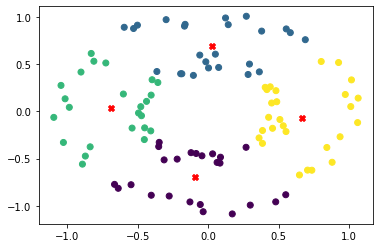

In [223]:
model_kmeans = cluster.KMeans(n_clusters=4, max_iter=50, random_state=1)
model_kmeans.fit(data)
data['cluster_id'] = model_kmeans.labels_
centroids = model_kmeans.cluster_centers_

plt.scatter(data['A'],data['B'], c=data['cluster_id'])
plt.scatter(centroids[:,0],centroids[:,1],marker='X',c='r')
plt.show()

In [108]:
data['cluster_id'] = model_kmeans.labels_

In [109]:
centroids = model_kmeans.cluster_centers_
print(centroids)

[[ 1.18780819 -0.07982386  0.        ]
 [-0.23144767  0.57845957  0.        ]]


In [254]:
model_kmeans = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
model_kmeans.fit(data)
data['cluster_id'] = model_kmeans.labels_
centroids = model_kmeans.cluster_centers_
print(centroids)

[[-5.84938602 -4.29998479  1.01492537]
 [-8.24132694  5.12663729  1.        ]]


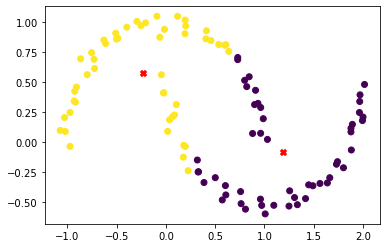

In [110]:
plt.scatter(data['A'],data['B'], c=data['cluster_id'])
plt.scatter(centroids[:,0],centroids[:,1],marker='X',c='r')
plt.show()

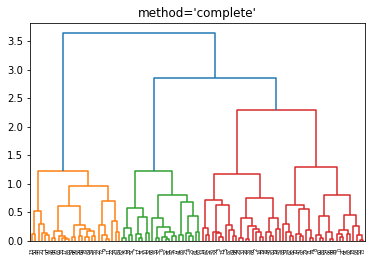

In [224]:
linkage_data = linkage(data, method='complete' , metric='euclidean')
dendrogram(linkage_data)
plt.title("method='complete'")
plt.show() 

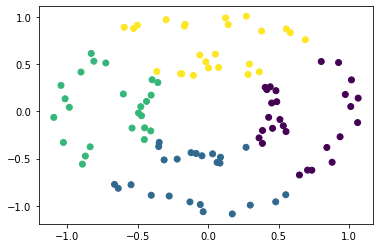

In [225]:
cluster_id = fcluster(linkage_data,t=1.5,criterion='distance')
plt.scatter(data["A"],data["B"],c=cluster_id)
plt.show()

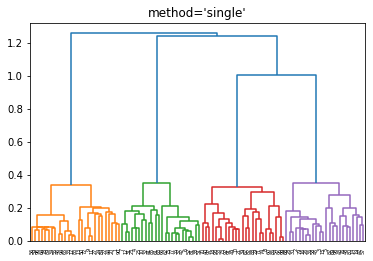

In [227]:
linkage_data = linkage(data, method='single' , metric='euclidean')
dendrogram(linkage_data)
plt.title("method='single'")
plt.show() 

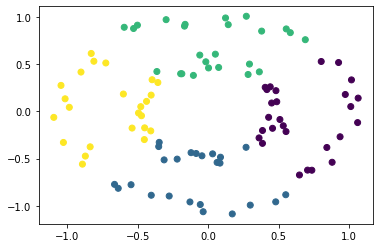

In [228]:
cluster_id = fcluster(linkage_data,t=1,criterion='distance')
plt.scatter(data["A"],data["B"],c=cluster_id)
plt.show()

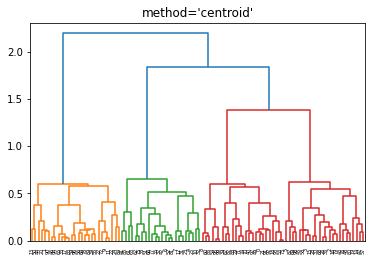

In [229]:
linkage_data = linkage(data, method='centroid' , metric='euclidean')
dendrogram(linkage_data)
plt.title("method='centroid'")
plt.show() 

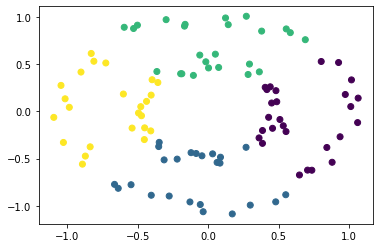

In [230]:
cluster_id = fcluster(linkage_data,t=1,criterion='distance')
plt.scatter(data["A"],data["B"],c=cluster_id)
plt.show()